   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-16-3467f63dea53>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
<ipython-input-16-3467f63dea53>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
<ipython-input-16-3467f63dea53>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

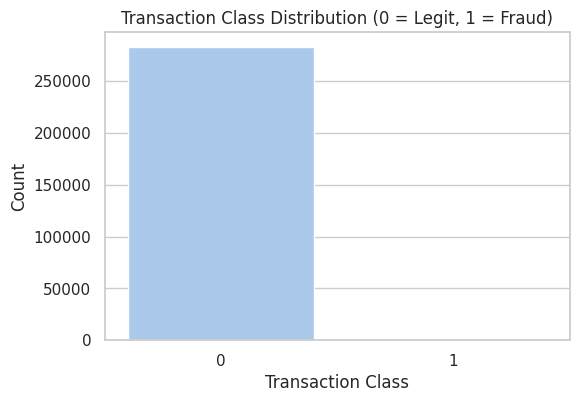

Fraudulent Transactions: 0.1667%


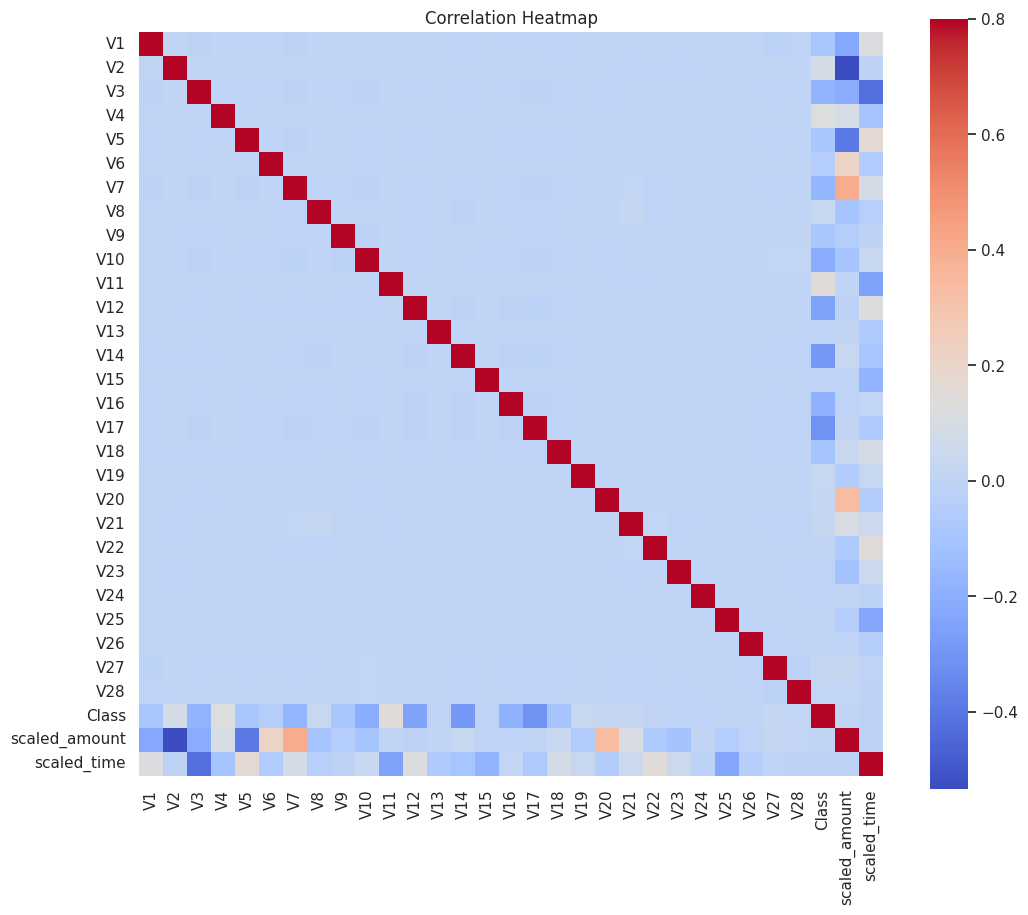

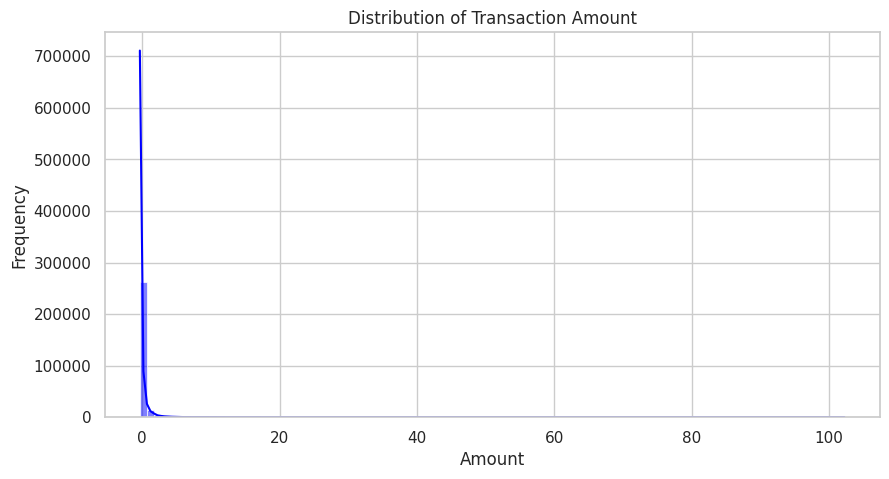

<ipython-input-16-3467f63dea53>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="scaled_amount", data=df, palette='Set2')


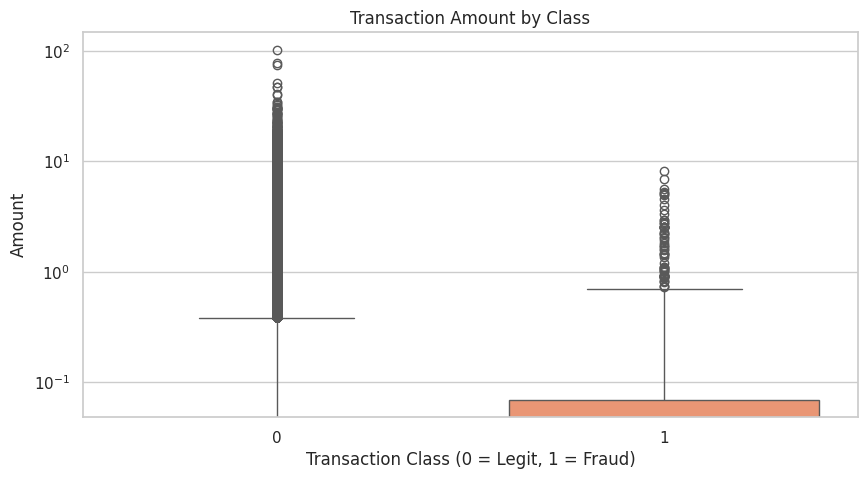

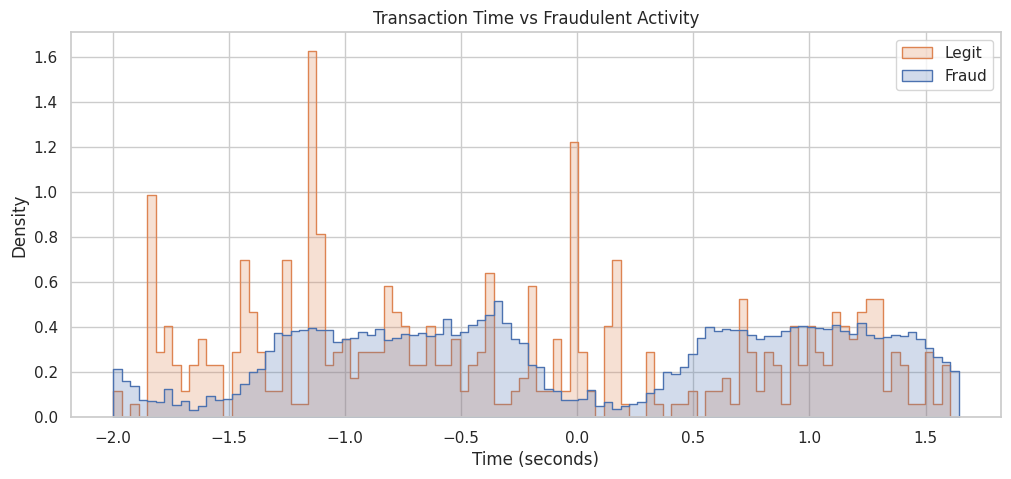

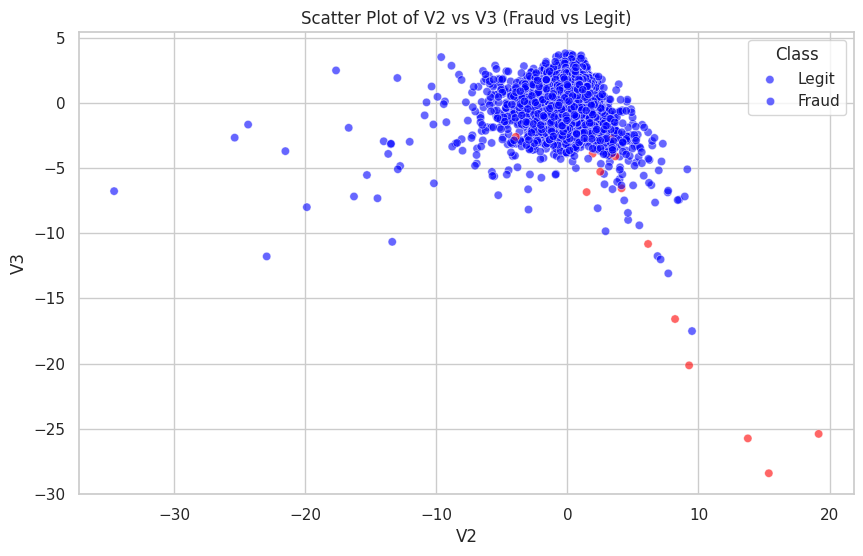

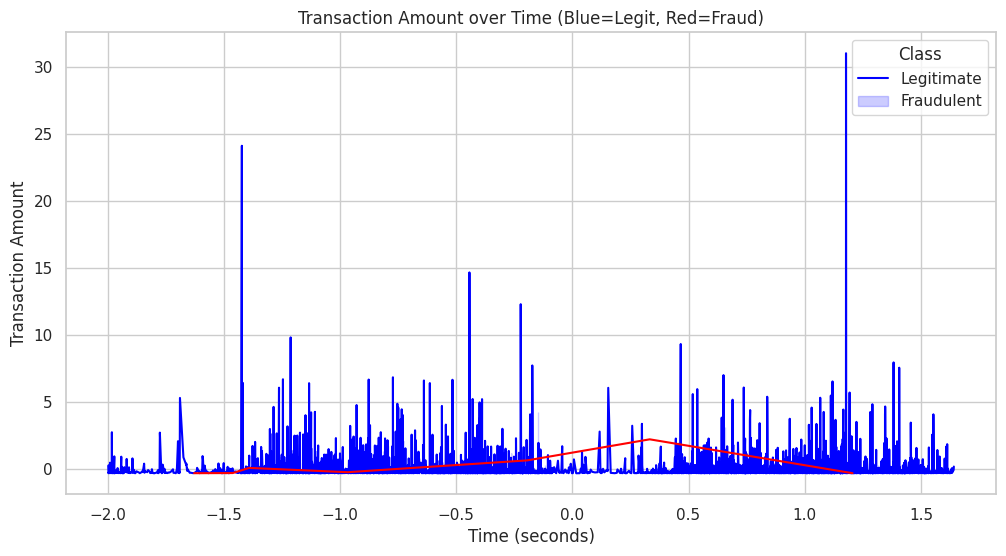

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")
print(df.head())

# Basic Info
print("Dataset Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicates:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' and 'Time' columns
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop the original columns
df = df.drop(['Time', 'Amount'], axis=1)


# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title("Transaction Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

# Display percentage of fraud
fraud_rate = df['Class'].value_counts(normalize=True)[1] * 100
print(f"Fraudulent Transactions: {fraud_rate:.4f}%")

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmax=0.8, square=True)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of transaction amount
plt.figure(figsize=(10,5))
sns.histplot(df['scaled_amount'], bins=100, kde=True, color='blue')
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Amount distribution for Fraud vs Non-Fraud
plt.figure(figsize=(10,5))
sns.boxplot(x="Class", y="scaled_amount", data=df, palette='Set2')
plt.title("Transaction Amount by Class")
plt.xlabel("Transaction Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Amount")
plt.yscale("log")
plt.show()

# Time vs Transaction Class
plt.figure(figsize=(12,5))
sns.histplot(data=df, x="scaled_time", hue="Class", bins=100, element="step", stat="density", common_norm=False)
plt.title("Transaction Time vs Fraudulent Activity")
plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.legend(["Legit", "Fraud"])
plt.show()

# Create a scatter plot of V2 vs V3 colored by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000),
                x='V2', y='V3',
                hue='Class',
                palette={0: 'blue', 1: 'red'},
                alpha=0.6)
plt.title("Scatter Plot of V2 vs V3 (Fraud vs Legit)")
plt.xlabel("V2")
plt.ylabel("V3")
plt.legend(title="Class", labels=["Legit", "Fraud"])
plt.grid(True)
plt.show()

# Sample data for faster plotting (optional)
df_sample = df.sample(5000, random_state=42).sort_values(by='scaled_time')

# Set plot style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sample, x='scaled_time', y='scaled_amount', hue='Class', palette={0: 'blue', 1: 'red'})

# Titles and labels
plt.title("Transaction Amount over Time (Blue=Legit, Red=Fraud)")
plt.xlabel("Time (seconds)")
plt.ylabel("Transaction Amount")
plt.legend(title="Class", labels=["Legitimate", "Fraudulent"])
plt.show()






In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Random Forest:
[[56649     2]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
[[56649     2]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

